# Proyecto 3 - Ataques a modelos de Deep Learning
Security Data Science

Sergio Marchena - 16387

UVG

In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
import seaborn as sns

## 1. Se debe mostrar un entrenamiento y predicción del modelo original 

In [2]:
dir = 'malimg_paper_dataset_imgs'
batches = ImageDataGenerator().flow_from_directory(directory=dir, target_size=(64,64), batch_size=10000)
imgs, labels = next(batches)

Found 9339 images belonging to 25 classes.


In [3]:
x_train, x_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)

print('y_train:', x_train.shape)
print('y_test: ', x_test.shape)

x_train: (6537, 64, 64, 3)
x_test:  (2802, 64, 64, 3)
y_train: (6537, 64, 64, 3)
y_test:  (2802, 64, 64, 3)


In [4]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test,  y_test, verbose=2)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Loaded model from disk


2022-05-13 20:05:30.060626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-13 20:05:30.061031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-13 20:05:30.311818: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-13 20:05:30.481604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


88/88 - 1s - loss: 0.0840 - accuracy: 0.9764 - 1s/epoch - 12ms/step
accuracy: 97.64%


In [5]:
y_predict = np.argmax(loaded_model.predict(x_test), axis=-1)
y_test = np.argmax(y_test, axis=1)

2022-05-13 20:05:31.610796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [6]:
c_matrix = metrics.confusion_matrix(y_test, y_predict)

In [7]:
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=10):
    df_cm = pd.DataFrame( confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",  cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


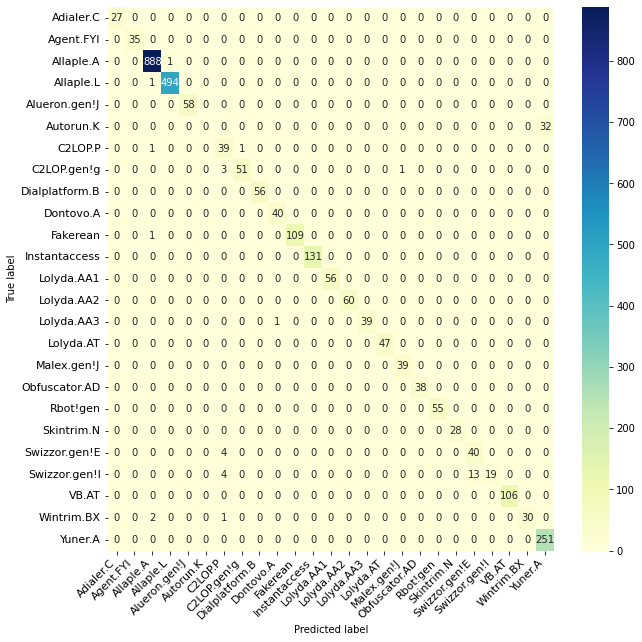

In [8]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (10,10), fontsize=11)

## 2. Se  debe  crear  un  modelo  robado  a  partir  del  modelo  original,  entrenado  con  data completamente aleatoria, con los ataques Copycat CNN y KnockoffNets. 

In [15]:
import art
from art.attacks import ExtractionAttack
from art.attacks.extraction import CopycatCNN, KnockoffNets
from art.classifiers import KerasClassifier

ModuleNotFoundError: No module named 'art.classifiers'

In [16]:
classifier_original = KerasClassifier(loaded_model, clip_values=(0, 1), use_logits=False)

NameError: name 'KerasClassifier' is not defined

In [14]:



num_epochs = 5
len_steal = 5000

attack_catalogue = {"Probabilistic CopycatCNN": CopycatCNN(classifier=loaded_model,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax CopycatCNN": CopycatCNN(classifier=loaded_model,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                    "Probabilistic KnockoffNets": KnockoffNets(classifier=loaded_model,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax KnockoffNets": KnockoffNets(classifier=loaded_model,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                   }

results = []

EstimatorError: CopycatCNN requires an estimator derived from <class 'art.estimators.estimator.BaseEstimator'> and <class 'art.estimators.classification.classifier.ClassifierMixin'>, the provided classifier is an instance of <class 'keras.engine.sequential.Sequential'> and is derived from (<class 'keras.engine.functional.Functional'>,).